In [1]:
import pandas as pd
from scipy.stats import f_oneway

# Load the data
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM457 Topic in BA/Individual Project/Datacoding/DataQ22.csv'
data = pd.read_csv(file_path)

# Extract data for age groups
age_groups = ['Age 0-15', 'Age 16-24', 'Age 25-34', 'Age 35-44', 'Age 45-54', 'Age 55-64', 'Age 65 and over']

# Collect spending data for each age group
spending_data = [data[group] for group in age_groups]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*spending_data)

# Output the results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Interpret the result
if p_value < 0.05:
    print("The spending is significantly different between the age groups.")
else:
    print("The spending is not significantly different between the age groups.")

F-statistic: 1.8529849232450029
P-value: 0.08742152510925796
The spending is not significantly different between the age groups.


In [2]:
import pandas as pd

# Load the CSV file to inspect its structure and contents
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM457 Topic in BA/Individual Project/Datacoding/DataQ22.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
# data.head()

from scipy.stats import f_oneway

# Extract spending data for the 7 age groups
age_groups_data = [
    data['Age 0-15'],
    data['Age 16-24'],
    data['Age 25-34'],
    data['Age 35-44'],
    data['Age 45-54'],
    data['Age 55-64'],
    data['Age 65 and over']
]

# Perform ANOVA test
anova_result = f_oneway(*age_groups_data)

# Display the results of the ANOVA test
anova_result

F_onewayResult(statistic=1.8529849232450029, pvalue=0.08742152510925796)

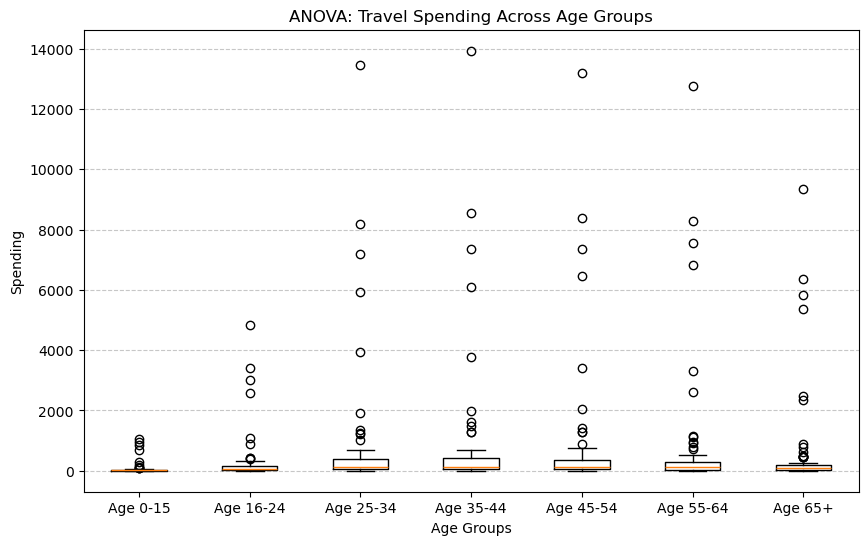

In [4]:
import matplotlib.pyplot as plt

# Create a boxplot for visual representation of spending by age groups
plt.figure(figsize=(10, 6))
plt.boxplot(age_groups_data, labels=[
    'Age 0-15', 'Age 16-24', 'Age 25-34', 
    'Age 35-44', 'Age 45-54', 'Age 55-64', 'Age 65+'
])
plt.title('ANOVA: Travel Spending Across Age Groups')
plt.ylabel('Spending')
plt.xlabel('Age Groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

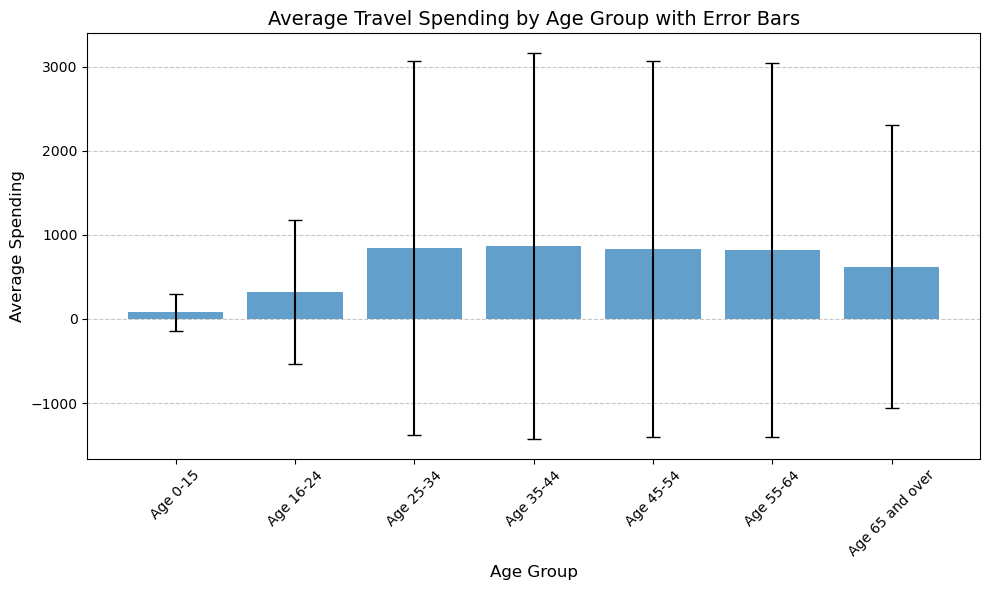

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM457 Topic in BA/Individual Project/Datacoding/DataQ22.csv'
data = pd.read_csv(file_path)

# Reshape the dataset into a long format for analysis
long_data = pd.melt(data, id_vars=["Region of Visit"], 
                    value_vars=['Age 0-15', 'Age 16-24', 'Age 25-34', 
                                'Age 35-44', 'Age 45-54', 'Age 55-64', 'Age 65 and over'], 
                    var_name="Age_Group", value_name="Spending")

# Calculate summary statistics
age_group_means = long_data.groupby("Age_Group")["Spending"].mean()
age_group_std = long_data.groupby("Age_Group")["Spending"].std()

# Create a bar chart with error bars (standard deviation)
plt.figure(figsize=(10, 6))
plt.bar(age_group_means.index, age_group_means, yerr=age_group_std, capsize=5, alpha=0.7)
plt.title("Average Travel Spending by Age Group with Error Bars", fontsize=14)
plt.ylabel("Average Spending", fontsize=12)
plt.xlabel("Age Group", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
